# 3. Applying pulse forcing to a flow
Here, we will show how to apply a transient force (a 'pulse') to a flow.

In [1]:
using ViscousFlow

In [2]:
using Plots

For this case, we first seek to introduce a pulse to an otherwise quiescent fluid,
with no boundaries. The pulse shape will be a smooth dipole, directed upward.

We will start with the usual steps: specify the problem parameters and the discretization.

In [3]:
Re = 200
xlim, ylim = (-2,2), (-2,4)
Δx,Δt = setstepsizes(Re,gridRe=4)

(0.02, 0.01)

### Construct the pulse
Now create the pulse. For the spatial shape of this pulse, we make use of a Gaussian
field, differentiated once in the `x` direction. We will center it at (0,0), and
give it a strength of 10.

In [4]:
σx = 0.5
σy = 0.1
gauss = SpatialGaussian(σx,σy,0,0,10,deriv=1);

Now we now 'shape' the pulse in time, also with a Gaussian. We center it at `t = 0.1`
with a half-width in time equal to 0.1.

In [5]:
t0 = 0.1
σt = 0.1
pparams = PulseParams(gauss,t0,σt);

### Construct the system structure
We supply these pulse characteristics with the keyword argument `pulses` as we
set up the usual system structure:

In [6]:
sys = NavierStokes(Re,Δx,xlim,ylim,Δt,pulses=pparams)

Unbounded Navier-Stokes system on a grid of size 208 x 308 and 0 static immersed points
   Static freestream = (0.0, 0.0)


The remaining steps go just as they did for the previous examples. We will simulate
the pulse for 5 time units and make an animation of the results:

In [7]:
u0 = newstate(sys)
tspan = (0.0,10.0) # longer than we need, but just being safe
integrator = init(u0,tspan,sys)

t: 0.0
u: (Dual nodes in a (nx = 208, ny = 308) cell grid of type Float64 data
  Number of Dual nodes: (nx = 208, ny = 308), Float64[])

In [8]:
step!(integrator,5.0)

### Examine

┌ Info: Saved animation to 
│   fn = /var/folders/1s/lds3nd1s7xn4mgf0vxqwg0kr0000gn/T/jl_g1xczK.gif
└ @ Plots /Users/jeff/.julia/packages/Plots/6EMd6/src/animation.jl:104


Plots.AnimatedGif("/var/folders/1s/lds3nd1s7xn4mgf0vxqwg0kr0000gn/T/jl_g1xczK.gif")
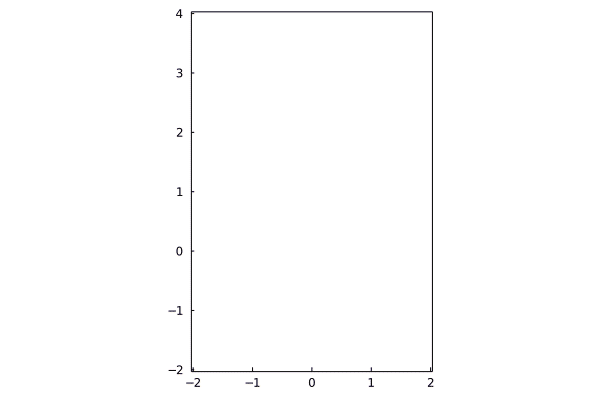

In [9]:
sol = integrator.sol
@gif for (u,t) in zip(sol.u,sol.t)
    plot(vorticity(u,sys,t),sys)
end every 5

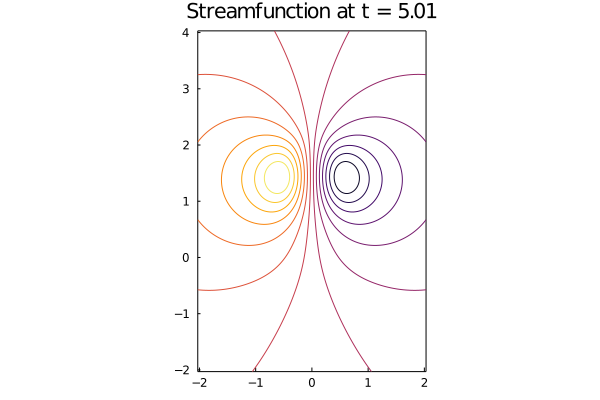

In [10]:
plot(streamfunction(integrator),sys,title="Streamfunction at t = $(round(integrator.t,digits=2))")

We can also supply more than one pulse. Let's give 3, each separated by 1 time unit.

In [11]:
pparams = [PulseParams(gauss,0.1,0.1), PulseParams(gauss,1.1,0.1), PulseParams(gauss,2.1,0.1)];

In [12]:
sys = NavierStokes(Re,Δx,xlim,ylim,Δt,pulses=pparams)

Unbounded Navier-Stokes system on a grid of size 208 x 308 and 0 static immersed points
   Static freestream = (0.0, 0.0)


In [13]:
u0 = newstate(sys)
tspan = (0.0,10.0)
integrator = init(u0,tspan,sys)

t: 0.0
u: (Dual nodes in a (nx = 208, ny = 308) cell grid of type Float64 data
  Number of Dual nodes: (nx = 208, ny = 308), Float64[])

In [14]:
step!(integrator,4.0)

### Examine

┌ Info: Saved animation to 
│   fn = /var/folders/1s/lds3nd1s7xn4mgf0vxqwg0kr0000gn/T/jl_7SsTY0.gif
└ @ Plots /Users/jeff/.julia/packages/Plots/6EMd6/src/animation.jl:104


Plots.AnimatedGif("/var/folders/1s/lds3nd1s7xn4mgf0vxqwg0kr0000gn/T/jl_7SsTY0.gif")
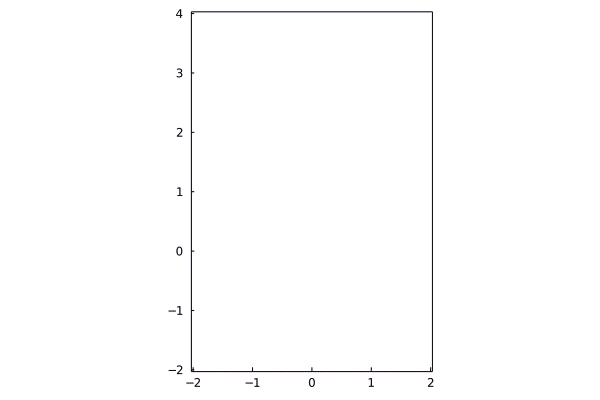

In [15]:
sol = integrator.sol
@gif for (u,t) in zip(sol.u,sol.t)
    plot(vorticity(u,sys,t),sys)
end every 5

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*